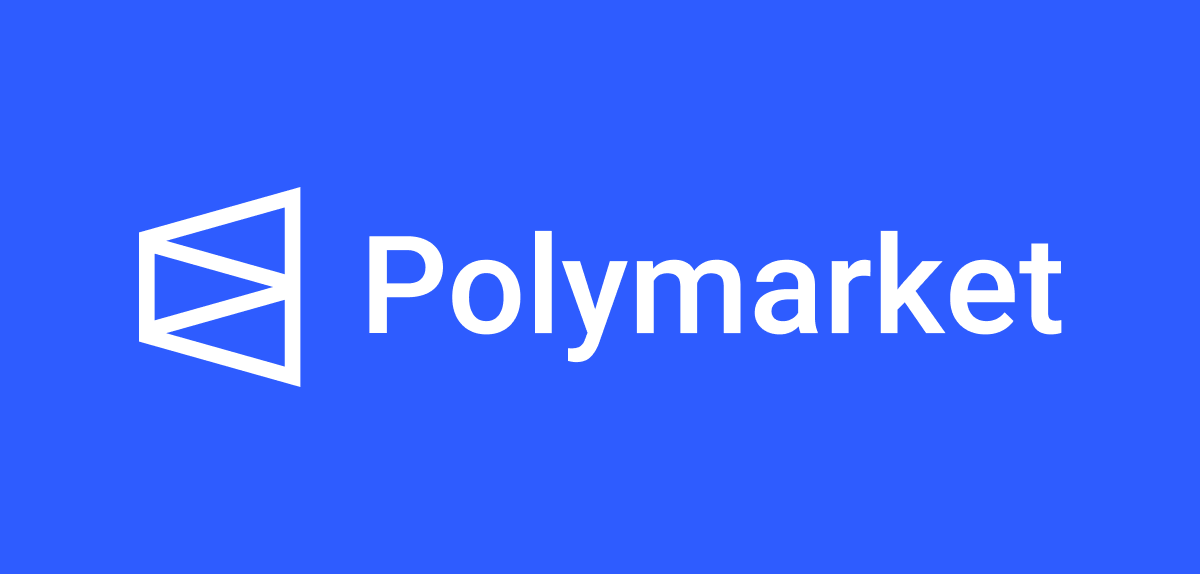

    Para poder generar un cliente de nivel 3 ( el que puede hacer operaciones) es necesario generar tres keys que son proporcionadas por Polymarket, esto por seguridad.

In [1]:
import sys, importlib
print("Python:", sys.executable)
print("py_clob_client encontrado:",
      importlib.util.find_spec("py_clob_client") is not None)


Python: /home/santiagogr/polymarket/Models/venv/bin/python
py_clob_client encontrado: True


In [2]:
from py_clob_client.constants import AMOY  # Cambia a AMOY si estás en testnet
from py_clob_client.clob_types import ApiCreds
from py_clob_client.client import ClobClient
from dotenv import load_dotenv
import os

# Cargar variables de entorno
load_dotenv()

def configure_client_level_3():
    # Configura el cliente con credenciales de Nivel 3
    host = "https://clob.polymarket.com/"  
    private_key = os.getenv("PK")
    api_key = os.getenv("CLOB_API_KEY")
    api_secret = os.getenv("CLOB_SECRET")
    api_passphrase = os.getenv("CLOB_PASS_PHRASE")
    chain_id = AMOY

    # Usar ApiCreds para credenciales
    creds = ApiCreds(
        api_key=api_key,
        api_secret=api_secret,
        api_passphrase=api_passphrase,
    )
    # Crear el cliente de Nivel 3
    client = ClobClient(
        host,
        chain_id=chain_id,
        key=private_key,
        creds=creds,
    )
    return client

# Crear cliente de Nivel 3
client = configure_client_level_3()
print("Cliente Nivel 3 configurado correctamente.")


Cliente Nivel 3 configurado correctamente.


In [3]:
import pandas as pd

def obtener_todos_los_mercados(cliente):
    all_markets = []  # Lista para almacenar todos los mercados
    next_cursor = ""  # Cursor inicial (vacío para comenzar desde el principio)

    while True:
        # Solicitar mercados con el cursor actual
        response = cliente.get_markets(next_cursor=next_cursor)

        # Extraer mercados de la clave 'data'
        markets = response.get("data", [])
        all_markets.extend(markets)

        # Obtener el siguiente cursor
        next_cursor = response.get("next_cursor", None)

        # Salir si no hay más páginas ('LTE=' indica el fin)
        if next_cursor == "LTE=":
            break

    # Convertir todos los mercados en un DataFrame
    return pd.DataFrame(all_markets)

# Obtener todos los mercados
todos_los_mercados_df = obtener_todos_los_mercados(client)

Mercados actuales

In [4]:
todos_los_mercados_df.shape

(45264, 29)

## Pasados

In [5]:
# --- switches ---
incluir_cerrados = True   # False  ➜  solo mercados abiertos
requerir_order_book  = False    # True   ➜  solo con order‑book habilitado

# --- dataframe base ---
mercados_interes = todos_los_mercados_df[
    ['closed', 'enable_order_book', 'condition_id',
     'question', 'market_slug', 'end_date_iso', 'game_start_time']
]

# --- filtro dinámico ---
pasados = mercados_interes[
    (mercados_interes['closed']          == incluir_cerrados) &
    (mercados_interes['enable_order_book'] == requerir_order_book)
]

display(pasados)


,closed,enable_order_book,condition_id,question,market_slug,end_date_iso,game_start_time
0,True,False,0x9deb0baac40648821f96f01339229a422e2f5c877de5...,NFL Saturday: Chiefs vs. Raiders,nfl-saturday-chiefs-vs-raiders,2023-01-07T00:00:00Z,2023-01-07T21:30:00Z
2,True,False,0x5317986240be3ab100ccbebeb8213ab45d1f5c502e6d...,Will the Nuggets be the 2022-23 NBA Champion?,will-the-nuggets-be-the-2022-23-nba-champion,2023-06-17T00:00:00Z,None
3,True,False,0x3d23087a0ed34ca1577afb1ae860714e9deddc8ff3cb...,Will 'Ant-Man and the Wasp: Quantumania' gross...,will-ant-man-and-the-wasp-quantumania-gross-mo...,2023-02-21T00:00:00Z,None
4,True,False,0x9831cf4e59285e5487e788d8a1435cb4753b9076a385...,Will Bryce Young be first QB selected in the 2...,will-bryce-young-be-first-qb-selected-in-the-2...,2023-04-28T00:00:00Z,None
5,True,False,0x92e46e922e9f87353535007c0e254ec43fc97c84a4a9...,UFC 284: Who will win - Maddalena or Brown?,ufc-284-who-will-win-maddalena-or-brown,2023-02-11T00:00:00Z,2023-02-13T03:00:00Z
...,...,...,...,...,...,...,...
44974,True,False,0x968cfc54f58d84ead35b00934bf57552daa9e5ee906c...,Will another player win the 2025 Barcelona Open?,will-another-player-win-the-2025-barcelona-open,2025-04-21T00:00:00Z,None
44976,True,False,0xeb96050a4a0cfa9fa3c530f25776cd0ff291851ea3d4...,Over 214.5,nba-lac-den-2025-04-21-total-214pt5,2025-04-29T00:00:00Z,2025-04-22T02:00:00Z
44980,True,False,0x9cb1a1ea36a7b44ff333013bd69f14a63ebd72273574...,Spread: Cavaliers (-14.5),nba-mia-cle-2025-04-20-spread-away-14pt5,2025-04-27T00:00:00Z,2025-04-20T23:00:00Z
44982,True,False,0xba2e08454f012142736d912a0163a7e8752882f6c59a...,Over 209.5,nba-mia-cle-2025-04-20-total-209pt5,2025-04-27T00:00:00Z,2025-04-20T23:00:00Z


In [6]:
# Filter markets where 'question' contains the word 'chess'
chess_markets = pasados[pasados['question'].str.contains("Chess", case=False, na=False)]
display(chess_markets)

,closed,enable_order_book,condition_id,question,market_slug,end_date_iso,game_start_time
36,True,False,0xec8ac7ee6c07430720d094add42b65f9bb58eee4d50c...,Will Wesley So win the WR Chess Masters?,will-wesley-so-win-the-wr-chess-masters,2023-02-26T00:00:00Z,None
342,True,False,0x41518b4c6cb26d9b95d5f5c791e52ceda562622f8e81...,Will Ian Nepomniachtchi win the WR Chess Masters?,will-ian-nepomniachtchi-win-the-wr-chess-masters,2023-02-25T00:00:00Z,None
439,True,False,0x1e4e3fd08a00d9c8bb4edf70ea1c00cb43a87a1d5a2e...,Will Nodirbek Abdusattorov win the WR Chess Ma...,will-nodirbek-abdusattorov-win-the-wr-chess-ma...,2023-02-26T00:00:00Z,None
717,True,False,0x99423dee483c90f3beda04ac4e145bfa155358a7db81...,Will Dommaraju Gukesh win the WR Chess Masters?,will-dommaraju-gukesh-win-the-wr-chess-masters,2023-02-26T00:00:00Z,None
2081,True,False,0xc10da8f75a10c8faa1112c637c31b29b0431cb7fc91b...,Will Ian Nepomniachtchi win the 2023 Superbet ...,will-ian-nepomniachtchi-win-the-2023-superbet-...,2023-05-14T00:00:00Z,None
...,...,...,...,...,...,...,...
41154,True,False,0xd672635dac2297145610b380117426e877931a78e8c8...,Will Nodirbek Abdusattorov score the most poin...,will-nodirbek-abdusattorov-score-the-most-poin...,2025-04-09T00:00:00Z,None
41305,True,False,0xefb9622beb4f4889d3170748dcf988134b6c33042b2a...,Will Hikaru Nakamura score the most points at ...,will-hikaru-nakamura-score-the-most-points-at-...,2025-04-09T00:00:00Z,None
41323,True,False,0x0d76fd9b169b3cd2296d720622c79a0346a98ccff564...,Will Magnus Carlsen score the most points at t...,will-magnus-carlsen-score-the-most-points-at-t...,2025-04-09T00:00:00Z,None
41373,True,False,0x8ffa248fddf4277fe0d85c85f698f9db8ddebba5f2bc...,Will Maxime Vachier-Lagrave score the most poi...,will-maxime-vachier-lagrave-score-the-most-poi...,2025-04-09T00:00:00Z,None


In [15]:
market_id = '0x0a0e013d878c72b86df18111730dba7a5afea48d58f30e9d6e9f7d03aa213da0'
display(client.get_market(market_id))

{'enable_order_book': False,
 'active': True,
 'closed': True,
 'archived': False,
 'accepting_orders': False,
 'accepting_order_timestamp': '2024-12-13T23:10:40Z',
 'minimum_order_size': 5,
 'minimum_tick_size': 0.001,
 'condition_id': '0x0a0e013d878c72b86df18111730dba7a5afea48d58f30e9d6e9f7d03aa213da0',
 'question_id': '0x317baf6f9b1019f1cbe10fc76165e6c3936f09d535f89b862204bbcee8f62f05',
 'question': 'Will Denis Lazavik win the Champions Chess Tour Finals?',
 'description': 'The Champions Chess Tour Finals 2024 is scheduled to take place December 17 - December 21 You can read more about this event here: https://www.chess.com/events/info/2024-champions-chess-tour-finals\n\nThis market will resolve to "Yes" if Denis Lazavik wins the Champions Chess Tour Finals 2024. Otherwise, this market will resolve to "No".\n\nIf at any point it becomes impossible for this person to win this tournament (e.g. they are eliminated in the bracket), this market will resolve immediately to "No".\n\nIf thi

## Activos

In [32]:
# --- switches ---
incluir_cerrados = False   # False  ➜  solo mercados abiertos
requerir_order_book  = True    # True   ➜  solo con order‑book habilitado

# --- dataframe base ---
mercados_interes = todos_los_mercados_df[
    ['closed', 'enable_order_book', 'condition_id',
     'question', 'market_slug', 'end_date_iso', 'game_start_time']
]

# --- filtro dinámico ---
activos = mercados_interes[
    (mercados_interes['closed']          == incluir_cerrados) &
    (mercados_interes['enable_order_book'] == requerir_order_book)
]

display(activos)


,closed,enable_order_book,condition_id,question,market_slug,end_date_iso,game_start_time
8563,False,True,,ARCH Will the match be a draw?,will-the-match-be-a-draw-romania-ukraine,None,None
12775,False,True,0x320045be25e331375755d9126cbe20a319ace7c7d925...,Arsenal wins the Premier League?,arsenal-wins-the-premier-league,2025-05-25T00:00:00Z,None
13060,False,True,0x405534c03f82e56a397478db7b068dbb683fb46c9762...,Liverpool wins the Premier League?,liverpool-wins-the-premier-league,2025-05-25T00:00:00Z,None
13508,False,True,0x0346db74f1c1c7e8a05ef281df7992dccbb2df8a6a3b...,Will Alexander Isak be the top goalscorer in t...,will-alexander-isak-be-the-top-goalscorer-in-t...,2025-05-25T00:00:00Z,None
13524,False,True,0x99a76eb4959604e2a1b7c6dedf1f75fb19491df21deb...,Will Barcelona win La Liga?,will-barcelona-win-la-liga,2025-05-25T00:00:00Z,None
...,...,...,...,...,...,...,...
45229,False,True,0xf90ece28ae930023dfe780ebc2b5c374242ee43af955...,Spread: Lakers (-9.5),nba-min-lal-2025-04-22-spread-away-9pt5,2025-04-30T00:00:00Z,2025-04-23T02:00:00Z
45230,False,True,0x18a3f0d22bb1e71216bca224a0ef8f9e5244268d2917...,Will Esteban Ocon win the 2025 Miami GP pole?,will-esteban-ocon-win-the-2025-miami-gp-pole,2025-05-05T00:00:00Z,None
45231,False,True,0x9ed4cb5a7554921fc4a8c34a4e0f1631bf555e2529b4...,Spread: Thunder (-10.5),nba-mem-okc-2025-04-22-spread-away-10pt5,2025-04-29T00:00:00Z,2025-04-22T23:30:00Z
45233,False,True,0x878d5343b628e1044cc4d1a29ab793d828accbafc6bf...,Will global temperature increase by less than ...,will-global-temperature-increase-by-less-than-...,2025-04-30T00:00:00Z,None


In [33]:
# Filter markets where 'question' contains the word 'chess'
chess_markets = activos[activos['question'].str.contains("Chess", case=False, na=False)]
display(chess_markets)

,closed,enable_order_book,condition_id,question,market_slug,end_date_iso,game_start_time


## Pendientes

In [34]:
from datetime import datetime, timezone

cols = ['active', 'closed', 'enable_order_book', 'condition_id',
        'question', 'market_slug', 'end_date_iso', 'game_start_time']

mercados_interes = todos_los_mercados_df[cols]

# 1.  No activos todavía
# 2.  No cerrados
pendientes = mercados_interes[
    (~mercados_interes['active']) &
    (~mercados_interes['closed'])
]

display(pendientes.head())


,active,closed,enable_order_book,condition_id,question,market_slug,end_date_iso,game_start_time
1,False,False,False,,archWill Kamala Harris win the 2024 US Preside...,archwill-kamala-harris-win-the-2024-us-preside...,2024-11-05T00:00:00Z,None
29,False,False,False,,Will Google publicly launch a ChatGPT competit...,will-google-publicly-launch-a-chatgpt-competit...,None,None
53,False,False,False,0x7b76dda87a490fe7fb793ba900c02685aaa193c75277...,archWill Gavin Newsom win the 2024 US Presiden...,archwill-gavin-newsom-win-the-2024-us-presiden...,2024-11-05T00:00:00Z,None
54,False,False,False,,Which party will control the U.S. Senate after...,which-party-will-control-the-us-senate-after-t...,2024-11-05T00:00:00Z,None
61,False,False,False,,Will Newcastle win the 2023 Premier League cha...,will-newcastle-win-the-2023-premier-league-cha...,2023-05-29T00:00:00Z,None


In [35]:
# Filter markets where 'question' contains the word 'chess'
chess_markets = pendientes[pendientes['question'].str.contains("Chess", case=False, na=False)]
display(chess_markets)

,active,closed,enable_order_book,condition_id,question,market_slug,end_date_iso,game_start_time
20243,False,False,False,,ARCH World Chess Championship: Game 2,arch-world-chess-championship-game-2,None,None
24689,False,False,False,,ARCH Will Levon Aronian win the 2025 Freestyle...,arch-will-levon-aronian-win-the-2025-freestyle...,None,None
24791,False,False,False,,ARCH Will another person win the 2025 Freestyl...,arch-will-another-person-win-the-2025-freestyl...,None,None
24800,False,False,False,,ARCH Will Alireza Firouzja win the 2025 Freest...,arch-will-alireza-firouzja-win-the-2025-freest...,None,None
24831,False,False,False,,ARCH Will Hikaru Nakamura win the 2025 Freesty...,arch-will-hikaru-nakamura-win-the-2025-freesty...,None,None
24858,False,False,False,,ARCH Will Gukesh Dommaraju win the 2025 Freest...,arch-will-gukesh-dommaraju-win-the-2025-freest...,None,None
24882,False,False,False,,ARCH Will Vladimir Fedoseev win the 2025 Frees...,arch-will-vladimir-fedoseev-win-the-2025-frees...,None,None
24924,False,False,False,,ARCH Will Nodirbek Abdusattorov win the 2025 F...,arch-will-nodirbek-abdusattorov-win-the-2025-f...,None,None
24954,False,False,False,,ARCH Will Vincent Keymer win the 2025 Freestyl...,arch-will-vincent-keymer-win-the-2025-freestyl...,None,None
24963,False,False,False,,ARCH Will Fabiano Caruana win the 2025 Freesty...,arch-will-fabiano-caruana-win-the-2025-freesty...,None,None


In [11]:
chess_markets['end_date_iso'] = pd.to_datetime(chess_markets['end_date_iso'])
chess_markets[chess_markets['end_date_iso'].dt.year.isin([2024])]

/tmp/ipykernel_18892/1236519887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chess_markets['end_date_iso'] = pd.to_datetime(chess_markets['end_date_iso'])


,closed,enable_order_book,condition_id,question,market_slug,end_date_iso,game_start_time



1. **`enable_order_book`:**
   - **Tipo:** Booleano (True/False).
   - **Descripción:** Indica si el libro de órdenes está habilitado para el mercado. Un valor de `True` permite realizar y gestionar órdenes en el mercado.

2. **`active`:**
   - **Tipo:** Booleano.
   - **Descripción:** Indica si el mercado está actualmente activo y operativo.

3. **`closed`:**
   - **Tipo:** Booleano.
   - **Descripción:** Indica si el mercado ha sido cerrado y ya no acepta nuevas órdenes.

4. **`archived`:**
   - **Tipo:** Booleano.
   - **Descripción:** Indica si el mercado está archivado. Los mercados archivados pueden no estar visibles en las interfaces activas.

5. **`accepting_orders`:**
   - **Tipo:** Booleano.
   - **Descripción:** Indica si el mercado está aceptando nuevas órdenes actualmente.

6. **`accepting_order_timestamp`:**
   - **Tipo:** Cadena de texto (ISO 8601 datetime).
   - **Descripción:** Marca de tiempo que indica desde cuándo el mercado comenzó a aceptar órdenes.

7. **`minimum_order_size`:**
   - **Tipo:** Numérico (float o decimal).
   - **Descripción:** Cantidad mínima requerida para realizar una orden en este mercado.

8. **`minimum_tick_size`:**
   - **Tipo:** Numérico (float o decimal).
   - **Descripción:** El tamaño mínimo de variación del precio que se permite en las órdenes en este mercado.

9. **`condition_id`:**
   - **Tipo:** Cadena de texto (str).
   - **Descripción:** Identificador único de la condición o evento que define los resultados del mercado.

10. **`question_id`:**
    - **Tipo:** Cadena de texto (str).
    - **Descripción:** Identificador único de la pregunta relacionada con este mercado.

11. **`question`:**
    - **Tipo:** Cadena de texto.
    - **Descripción:** Pregunta específica asociada al mercado, como "¿Ganará Magnus Carlsen esta partida?".

12. **`description`:**
    - **Tipo:** Cadena de texto.
    - **Descripción:** Descripción detallada del mercado o evento.

13. **`market_slug`:**
    - **Tipo:** Cadena de texto.
    - **Descripción:** Nombre amigable para URLs o identificador del mercado.

14. **`end_date_iso`:**
    - **Tipo:** Cadena de texto (ISO 8601 datetime).
    - **Descripción:** Fecha y hora en que el mercado cerrará.

15. **`game_start_time`:**
    - **Tipo:** Cadena de texto (ISO 8601 datetime).
    - **Descripción:** Fecha y hora de inicio del evento relacionado con el mercado.

16. **`seconds_delay`:**
    - **Tipo:** Entero (int).
    - **Descripción:** Retraso en segundos antes de que las órdenes o eventos sean procesados.

17. **`fpmm`:**
    - **Tipo:** Booleano o Cadena de texto.
    - **Descripción:** Indica si el mercado utiliza un mecanismo de predicción como un "Fixed Product Market Maker" para calcular probabilidades y precios.

18. **`maker_base_fee`:**
    - **Tipo:** Numérico (float).
    - **Descripción:** Tasa base aplicada a los makers (proveedores de liquidez) en este mercado.

19. **`taker_base_fee`:**
    - **Tipo:** Numérico (float).
    - **Descripción:** Tasa base aplicada a los takers (tomadores de liquidez) en este mercado.

20. **`notifications_enabled`:**
    - **Tipo:** Booleano.
    - **Descripción:** Indica si las notificaciones están habilitadas para este mercado.

21. **`neg_risk`:**
    - **Tipo:** Booleano.
    - **Descripción:** Indica si el mercado maneja configuraciones de riesgo negativo.

22. **`neg_risk_market_id`:**
    - **Tipo:** Cadena de texto (str).
    - **Descripción:** Identificador del mercado relacionado con riesgo negativo.

23. **`neg_risk_request_id`:**
    - **Tipo:** Cadena de texto (str).
    - **Descripción:** Identificador único de la solicitud para manejar el riesgo negativo en este mercado.

24. **`icon`:**
    - **Tipo:** Cadena de texto (URL o ruta).
    - **Descripción:** URL o referencia al ícono representativo del mercado.

25. **`image`:**
    - **Tipo:** Cadena de texto (URL o ruta).
    - **Descripción:** URL o referencia a la imagen asociada al mercado.

26. **`rewards`:**
    - **Tipo:** Numérico o Booleano.
    - **Descripción:** Indica si hay recompensas asociadas al mercado (por ejemplo, para liquidez o participación).

27. **`is_50_50_outcome`:**
    - **Tipo:** Booleano.
    - **Descripción:** Indica si el resultado del mercado tiene probabilidades iniciales equilibradas (50/50).

28. **`tokens`:**
    - **Tipo:** Lista o Cadena de texto.
    - **Descripción:** Tokens o activos asociados a este mercado.

29. **`tags`:**
    - **Tipo:** Lista o Cadena de texto.
    - **Descripción:** Etiquetas relacionadas con el mercado, como categorías o temas (por ejemplo, "ajedrez", "deportes").



## Modelo

Step to build a model of chess:
1) Read the data that a downloaded, the format is in PGN, so the idea is pass that format to PD
2) Check the data

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# 1. Cargar los datos
data_chess = pd.read_csv(r'/home/santiagogr/polymarket/Model_machine/matches_data.csv')


ModuleNotFoundError: No module named 'sklearn'

In [ ]:

# 2. Convertir fechas
data_chess['Date'] = pd.to_datetime(data_chess['Date'], errors='coerce')

# 3. Convertir resultados a valores numéricos
result_map = {'0-1': -1, '1/2-1/2': 0, '1-0': 1}
data_chess['Result'] = data_chess['Result'].map(result_map)

# 4. Filtrar partidas con Elo > 2500 y eliminar partidas de máquinas
data_chess = data_chess[
    (data_chess['WhiteElo'] > 2500) & 
    (data_chess['BlackElo'] > 2500) &
    (data_chess['WhiteElo'] <= 3000) & 
    (data_chess['BlackElo'] <= 3000)
]


In [ ]:

# 5. Crear características básicas
data_chess['Elo_Difference'] = data_chess['WhiteElo'] - data_chess['BlackElo']
data_chess['Expected_Score'] = 1 / (1 + 10**((data_chess['BlackElo'] - data_chess['WhiteElo'])/400))


/tmp/ipykernel_4263/109575284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chess['Elo_Difference'] = data_chess['WhiteElo'] - data_chess['BlackElo']
/tmp/ipykernel_4263/109575284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chess['Expected_Score'] = 1 / (1 + 10**((data_chess['BlackElo'] - data_chess['WhiteElo'])/400))
/tmp/ipykernel_4263/109575284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [ ]:
data_chess

,Event,Site,Date,Round,White,Black,Result,WhiteTitle,BlackTitle,WhiteElo,BlackElo,ECO,Opening,Variation,WhiteFideId,BlackFideId,EventDate,Elo_Difference,Expected_Score,White_Advantage
92,89th Hastings Masters 2013-14,Hastings ENG,2014-01-02,6.1,"Mchedlishvili,M","Pert,N",0.0,GM,GM,2649.0,2554.0,D17,QGD Slav,Krause attack,13600966.0,403989.0,2013.12.28,95.0,0.633408,1
93,89th Hastings Masters 2013-14,Hastings ENG,2014-01-02,6.2,Ma Qun,"Tomczak,J",0.0,GM,GM,2595.0,2569.0,C09,French,"Tarrasch, open variation, main line",8603154.0,1124668.0,2013.12.28,26.0,0.537347,1
138,89th Hastings Masters 2013-14,Hastings ENG,2014-01-03,7.1,"Hawkins,Jo","Mchedlishvili,M",0.0,IM,GM,2512.0,2649.0,D97,Gruenfeld,"Russian, Prins variation",412686.0,13600966.0,2013.12.28,-137.0,0.312462,1
140,89th Hastings Masters 2013-14,Hastings ENG,2014-01-03,7.3,"Pert,N",Ma Qun,0.0,GM,GM,2554.0,2595.0,D19,QGD Slav,Dutch variation,403989.0,8603154.0,2013.12.28,-41.0,0.441269,1
184,89th Hastings Masters 2013-14,Hastings ENG,2014-01-04,8.1,"Mchedlishvili,M","Khenkin,I",0.0,GM,GM,2649.0,2598.0,D38,QGD,Ragozin variation,13600966.0,4659600.0,2013.12.28,51.0,0.572872,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920664,Chinese Teams 2013,Tianjin CHN,2013-12-24,22.4,Wan Yunguo,"Ponomariov,R",0.0,IM,GM,2516.0,2731.0,B90,Sicilian,"Najdorf, Byrne (English) attack",8603189.0,14103320.0,2013.04.30,-215.0,0.224847,1
2920665,Chinese Teams 2013,Tianjin CHN,2013-12-24,22.4,Zhao Zong Yuan,Wei Yi,1.0,GM,GM,2579.0,2604.0,B70,Sicilian,dragon variation,3202534.0,8603405.0,2013.04.30,-25.0,0.464084,1
2920666,Chinese Teams 2013,Tianjin CHN,2013-12-24,22.4,Zhang Pengxiang,Yu Ruiyuan,0.0,GM,GM,2574.0,2553.0,B01,"Scandinavian defence, Gruenfeld variation",NaN,8600970.0,8603090.0,2013.04.30,21.0,0.530185,1
2920670,Chinese Teams 2013,Tianjin CHN,2013-12-24,22.5,Wang Yue,"Motylev,A",0.0,GM,GM,2725.0,2645.0,A07,Reti,"King's Indian attack, Keres variation",8601429.0,4121830.0,2013.04.30,80.0,0.613137,1


In [ ]:

# 6. Calcular estadísticas históricas
white_stats = data_chess.groupby('White')['Result'].agg(['count', 'sum']).rename(columns={'count': 'white_games', 'sum': 'white_wins'})
white_stats['white_draws'] = data_chess.groupby('White')['Result'].apply(lambda x: (x == 0).sum())
white_stats['white_winrate'] = (white_stats['white_wins'] + 0.5 * white_stats['white_draws']) / white_stats['white_games']

black_stats = data_chess.groupby('Black')['Result'].agg(['count', 'sum']).rename(columns={'count': 'black_games', 'sum': 'black_wins'})
black_stats['black_draws'] = data_chess.groupby('Black')['Result'].apply(lambda x: (x == 0).sum())
black_stats['black_winrate'] = (black_stats['black_wins'] + 0.5 * black_stats['black_draws']) / black_stats['black_games']

# Agregar estadísticas a cada partida
data_chess = data_chess.merge(white_stats[['white_winrate']], left_on='White', right_index=True, how='left')
data_chess = data_chess.merge(black_stats[['black_winrate']], left_on='Black', right_index=True, how='left')


In [ ]:

# 7. Calcular forma reciente
data_chess = data_chess.sort_values('Date')
data_chess['recent_white_form'] = data_chess.groupby('White')['Result'].transform(lambda x: x.rolling(10, min_periods=1).mean())
data_chess['recent_black_form'] = data_chess.groupby('Black')['Result'].transform(lambda x: x.rolling(10, min_periods=1).mean())


In [ ]:

# 8. Limpiar valores nulos
features = [
    'Elo_Difference',
    'Expected_Score',
    'White_Advantage',
    'white_winrate',
    'black_winrate',
    'recent_white_form',
    'recent_black_form'
]

data_chess = data_chess.dropna(subset=features + ['Result'])


In [ ]:

# 9. Preparar datos para el modelo
X = data_chess[features]
y = data_chess['Result']

# 10. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 12. Entrenar modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 13. Función para predecir
def predict_chess_match(model, white_player, black_player, white_elo, black_elo):
    match_features = pd.DataFrame({
        'Elo_Difference': [white_elo - black_elo],
        'Expected_Score': [1 / (1 + 10**((black_elo - white_elo)/400))],
        'White_Advantage': [1],
        'white_winrate': [data_chess[data_chess['White'] == white_player]['white_winrate'].mean()],
        'black_winrate': [data_chess[data_chess['Black'] == black_player]['black_winrate'].mean()],
        'recent_white_form': [data_chess[data_chess['White'] == white_player]['recent_white_form'].iloc[-1]],
        'recent_black_form': [data_chess[data_chess['Black'] == black_player]['recent_black_form'].iloc[-1]]
    })
    
    match_features_scaled = scaler.transform(match_features)
    probs = model.predict_proba(match_features_scaled)[0]
    
    return {
        'Victoria Blancas': probs[2],
        'Empate': probs[1],
        'Victoria Negras': probs[0]
    }

# 14. Evaluación del modelo
print("\nEvaluación del modelo:")
print(f"Precisión en conjunto de prueba: {rf_model.score(X_test_scaled, y_test):.3f}")

# 15. Importancia de características
importancia = pd.DataFrame({
    'caracteristica': features,
    'importancia': rf_model.feature_importances_
})
print("\nImportancia de las características:")
print(importancia.sort_values('importancia', ascending=False))

# 16. Ejemplo de predicción
ejemplo_jugadores = {
    'white_player': data_chess['White'].iloc[0],
    'black_player': data_chess['Black'].iloc[0],
    'white_elo': 2700,
    'black_elo': 2650
}

prediccion = predict_chess_match(
    rf_model,
    ejemplo_jugadores['white_player'],
    ejemplo_jugadores['black_player'],
    ejemplo_jugadores['white_elo'],
    ejemplo_jugadores['black_elo']
)

print("\nPredicción de ejemplo:")
for resultado, prob in prediccion.items():
    print(f"{resultado}: {prob:.2%}")

# 17. Guardar algunas estadísticas útiles
print("\nEstadísticas del dataset:")
print(f"Número total de partidas: {len(data_chess)}")
print("\nDistribución de resultados:")
print(data_chess['Result'].value_counts(normalize=True))

In [ ]:
data_chess

,Event,Site,Date,Round,White,Black,Result,WhiteTitle,BlackTitle,WhiteElo,...,WhiteFideId,BlackFideId,EventDate,Elo_Difference,Expected_Score,White_Advantage,white_winrate,black_winrate,recent_white_form,recent_black_form
2689073,TCh-CAT 2012,Catalunya ESP,2012-02-25,5.1,"Spraggett,K","Gonzalez Garcia,J2",-1.0,GM,GM,2584.0,...,2600013.0,5101174.0,2012.01.28,55.0,0.578497,1,0.062500,0.450000,-1.0,-1.0
2689106,TCh-CAT 2012,Catalunya ESP,2012-04-21,11.1,"Gonzalez Garcia,J2","Narciso Dublan,M",0.0,GM,GM,2529.0,...,5101174.0,2201500.0,2012.01.28,-5.0,0.492805,1,0.318182,0.489691,0.0,0.0
2688912,Coupe de France 2012,Bois-Colombes FRA,2012-05-19,1,"Edouard,R","Feller,S",0.0,GM,GM,2625.0,...,633429.0,634654.0,2012.05.19,-15.0,0.478427,1,0.235646,0.454545,0.0,0.0
2688929,Coupe de France 2012,Bois-Colombes FRA,2012-05-20,2,"Magem Badals,J","Gozzoli,Y",0.0,GM,GM,2549.0,...,2200074.0,616915.0,2012.05.19,-2.0,0.497122,1,0.365385,0.308219,0.0,0.0
2687600,5th Mayors Cup 2012,Mumbai IND,2012-06-10,6.2,"Aleksandrov,A","Gomez,Joh",1.0,GM,GM,2606.0,...,13500139.0,5201381.0,2012.06.07,99.0,0.638738,1,0.231118,0.442308,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686700,Weissenhaus Play-In Swiss,chess.com INT,2025-01-06,5.0,"Moroni,L","Lazavik,Denis",-1.0,GM,GM,2545.0,...,865834.0,13515110.0,2025.01.06,-33.0,0.452651,1,0.083141,0.079027,0.1,-0.4
1324787,EE May Blitz Open 2021,Europe-Echecs INT,NaT,10,"Deac,Bogdan-Daniel","Tabatabaei,M",0.0,GM,GM,2627.0,...,1226380.0,12521213.0,2021.05.09,14.0,0.520137,1,0.337325,0.200000,0.2,0.0
1324788,EE May Blitz Open 2021,Europe-Echecs INT,NaT,10,"Keymer,Vincent","Jobava,Ba",0.0,GM,GM,2591.0,...,12940690.0,13601520.0,2021.05.09,-12.0,0.482737,1,0.286008,0.138484,-0.1,-0.1
1324789,EE May Blitz Open 2021,Europe-Echecs INT,NaT,10,"Santos Latasa,J","Kamsky,G",0.0,GM,GM,2608.0,...,2293307.0,2000024.0,2021.05.09,-57.0,0.418699,1,0.343545,0.280876,-0.3,0.1
